## Movie Recommendtaion System

### Data Preprocessing and manipulation

In [528]:
import pandas as pd
import numpy as np
import re

In [529]:
# importing the movies datasets
movies = pd.read_csv(r"D:\Data\Movie-Recommendation-System\ml-latest-small\movies.csv")  # If it's in a folder named data
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [530]:
# Importing the ratings datasets
rating = pd.read_csv(r"D:\Data\Movie-Recommendation-System\ml-latest-small\ratings.csv")
rating.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [531]:
# Importing the tags datasets
tags = pd.read_csv(r"D:\Data\Movie-Recommendation-System\ml-latest-small\tags.csv")
tags.head(10)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [532]:
# Importing the links datasets
links = pd.read_csv(r"D:\Data\Movie-Recommendation-System\ml-latest-small\links.csv")
links.head(10)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [533]:
# movies dataset information
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [534]:
# ratings dataset information
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [535]:
# links dataset information
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [536]:
# tags dataset information
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [537]:
# checking for rating unique values
rating.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [538]:
# checking for movies unique values
movies.nunique()

movieId    9742
title      9737
genres      951
dtype: int64

In [539]:
# checking ratings distribution
rating['rating'].value_counts().sort_index()

rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64

In [540]:
# checking the most popular genres
movies['genres'].value_counts().head(10)

genres
Drama                   1053
Comedy                   946
Comedy|Drama             435
Comedy|Romance           363
Drama|Romance            349
Documentary              339
Comedy|Drama|Romance     276
Drama|Thriller           168
Horror                   167
Horror|Thriller          135
Name: count, dtype: int64

In [541]:
# checking the statistics of ratings
rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [542]:
# checking the top 10 most rated movies (by number of ratings)
# compute counts per movieId from the ratings dataset
ratings_per_movie = rating['movieId'].value_counts()
# take the top 10 movieIds
top_10_movie_ids = ratings_per_movie.head(10).index
# map movieId to title using the movies dataframe
id_to_title = movies.set_index('movieId')['title']
# create a list of titles for the top 10 movieIds
top_10_movies = [id_to_title.get(mid, str(mid)) for mid in top_10_movie_ids]
top_10_movies

['Forrest Gump (1994)',
 'Shawshank Redemption, The (1994)',
 'Pulp Fiction (1994)',
 'Silence of the Lambs, The (1991)',
 'Matrix, The (1999)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Jurassic Park (1993)',
 'Braveheart (1995)',
 'Terminator 2: Judgment Day (1991)',
 "Schindler's List (1993)"]

In [543]:
# Calculate sparsity
# Sparsity = 1 - (number of ratings / (number of users * number of movies))

# number of unique users
n_users = rating['userId'].nunique()

# number of unique movies
n_movies = rating['movieId'].nunique()

# number of ratings
n_ratings = len(rating)

sparsity = 1 - (n_ratings / (n_users * n_movies))
print(f"Users: {n_users}, Movies: {n_movies}, Sparsity: {sparsity:.2%}")

Users: 610, Movies: 9724, Sparsity: 98.30%


In [544]:
movies_rating = pd.merge(movies, rating, on='movieId')
movies_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [545]:
# Extract the year from the title
movies_rating['year'] = movies_rating['title'].str.extract(r'\((\d{4})\)')

# Convert year column to numeric (int)
movies_rating['year'] = pd.to_numeric(movies_rating['year'], errors='coerce')

movies_rating[['title', 'year']].head()


,title,year
0,Toy Story (1995),1995.0
1,Toy Story (1995),1995.0
2,Toy Story (1995),1995.0
3,Toy Story (1995),1995.0
4,Toy Story (1995),1995.0


In [546]:
movies_rating['year'] = movies_rating['year'].astype('Int64')

In [547]:
movies_rating['title'] = movies_rating['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()
movies_rating.head()


,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1995


In [548]:
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis (EDA)

Starting the EDA with the Most Rated movies. This tells which movies were rated by the most people, i.e., the most popular or frequently watched.

C:\Users\User\AppData\Local\Temp\ipykernel_16004\160707584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  top_10_barplot = sns.barplot(x=top_10_counts, y=top_10_movies, palette='deep')


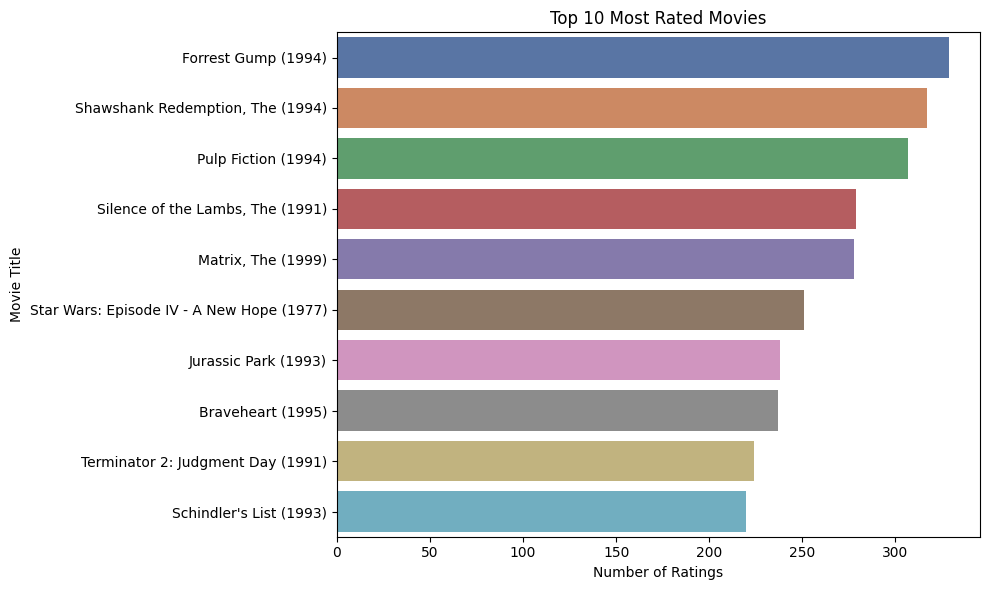

In [549]:
# Visualizing the top 10 most rated movies
plt.figure(figsize=(10, 6))
# use the counts computed from the ratings dataframe
top_10_counts = rating['movieId'].value_counts().head(10).values
# top_10_movies was created in the previous cell as a list of titles
top_10_barplot = sns.barplot(x=top_10_counts, y=top_10_movies, palette='deep')
top_10_barplot.set_title('Top 10 Most Rated Movies')
top_10_barplot.set_xlabel('Number of Ratings')
top_10_barplot.set_ylabel('Movie Title')
plt.tight_layout()
plt.show()

Checking for the rating distribution across our

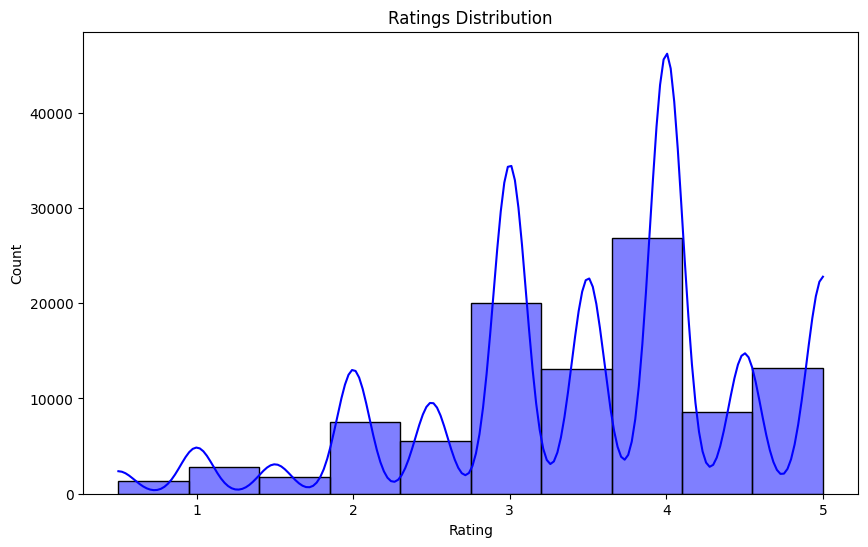

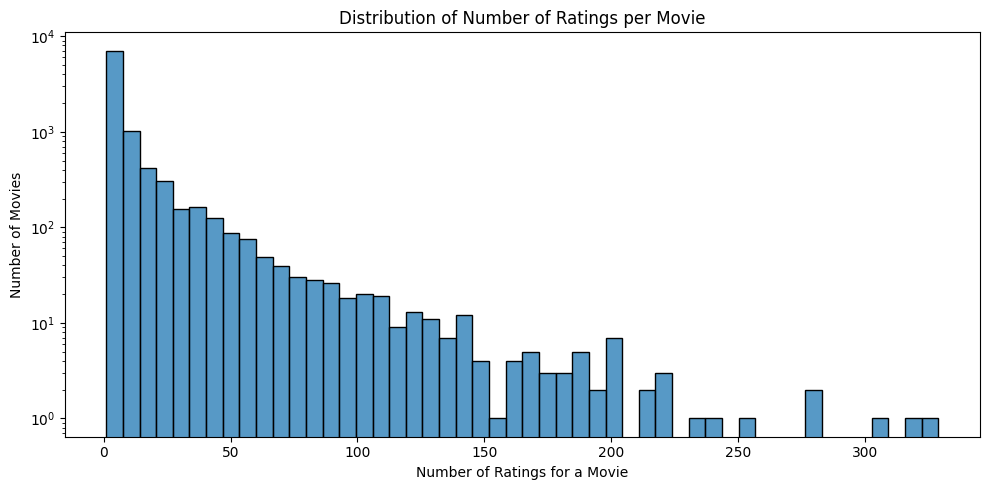

In [550]:
# Visualizing the ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(rating['rating'], bins=10, kde=True, color='blue')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Visualizing the number of ratings per movie (improved)
ratings_per_movie = rating['movieId'].value_counts()

plt.figure(figsize=(10,5))
sns.histplot(ratings_per_movie, bins=50, kde=False, color='C0')
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings for a Movie')
plt.ylabel('Number of Movies')
plt.yscale('log')  # optional: show long-tail more clearly
plt.tight_layout()
plt.show()


In [551]:
# Highest rated movie
highest_rated = movies_rating['rating'].value_counts()
highest_rated

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_16004\3790539961.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='deep')


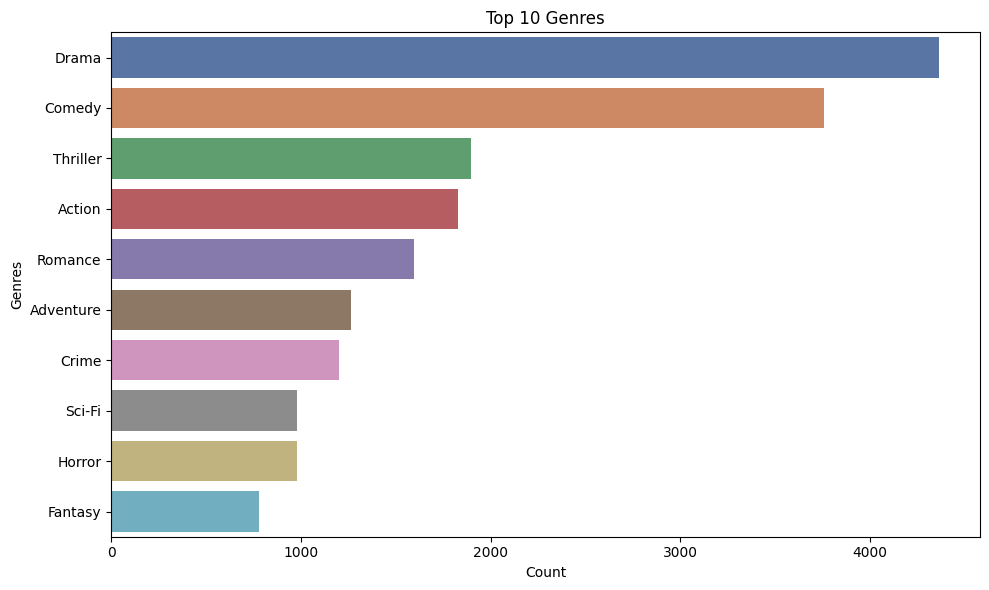

In [552]:
# Distribution by genre
# The issue is that 'genres' is a string with multiple genres separated by '|', so value_counts() on 'genres' counts unique combinations, not individual genres.
# To get the top 10 individual genres, you need to split the strings and count each genre separately.

# Split genres and explode to get one genre per row
all_genres = movies['genres'].str.split('|').explode()
# Count occurrences of each genre
top_10_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='deep')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

In [553]:
movies_rating.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1995


In [554]:
# Highest rated movies (with at least 50 ratings)
avg_rating = movies_rating.groupby('movieId')['rating'].mean()
count_rating = movies_rating.groupby('movieId')['rating'].count()
summary = pd.DataFrame({'avg_rating': avg_rating, 'count_rating': count_rating})
filtered = summary[summary['count_rating'] > 30]  # avoid small-sample bias
top_movies = filtered.sort_values('avg_rating', ascending=False).head(10)
pd.merge(top_movies, movies, on='movieId')[['title', 'avg_rating', 'count_rating']]


,title,avg_rating,count_rating
0,"Shawshank Redemption, The (1994)",4.429022,317
1,Lawrence of Arabia (1962),4.300000,45
2,"Godfather, The (1972)",4.289062,192
3,Fight Club (1999),4.272936,218
4,Cool Hand Luke (1967),4.271930,57
5,Dr. Strangelove or: How I Learned to Stop Worr...,4.268041,97
6,Rear Window (1954),4.261905,84
7,"Godfather: Part II, The (1974)",4.259690,129
8,"Departed, The (2006)",4.252336,107
9,Goodfellas (1990),4.250000,126


C:\Users\User\AppData\Local\Temp\ipykernel_16004\2744826183.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rating', y='title', data=top_movies_with_titles, palette='viridis')


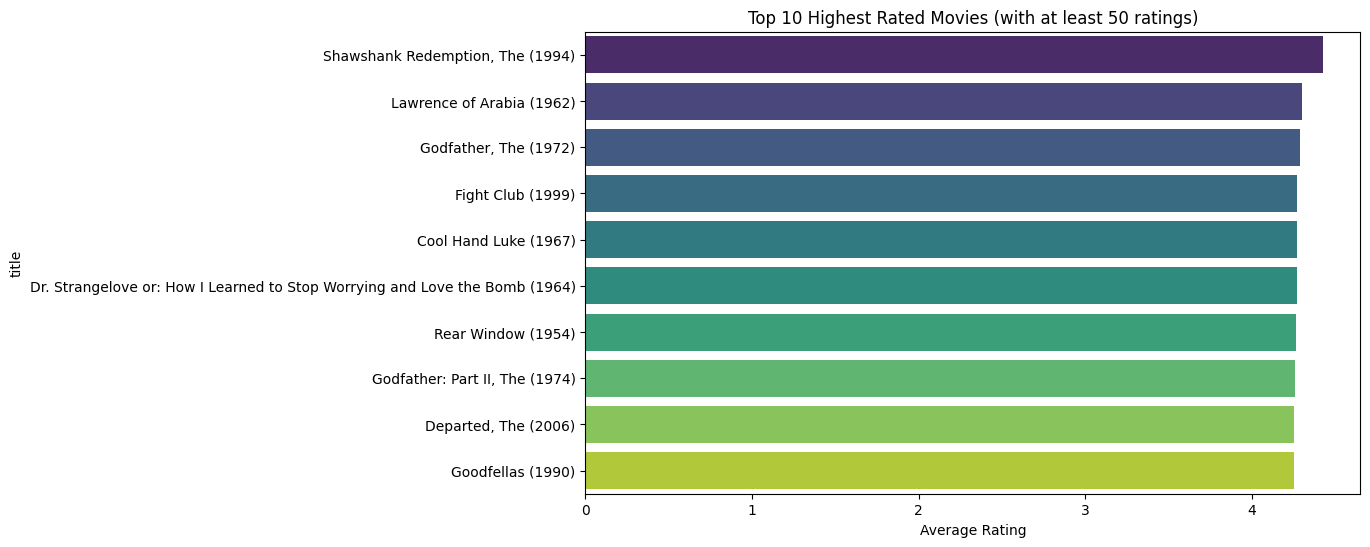

In [555]:
# Plotting the top 10 highest rated movies (with at least 50 ratings)
plt.figure(figsize=(10, 6))
# Merge top_movies with movies to get the titles
top_movies_with_titles = pd.merge(top_movies, movies, left_index=True, right_on='movieId')
sns.barplot(x='avg_rating', y='title', data=top_movies_with_titles, palette='viridis')
plt.title('Top 10 Highest Rated Movies (with at least 50 ratings)')
plt.xlabel('Average Rating')    
plt.show()

In [556]:
most_popular = summary.sort_values('count_rating', ascending=False).head(10)
pd.merge(most_popular, movies, on='movieId')[['title', 'count_rating']]


,title,count_rating
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
5,Star Wars: Episode IV - A New Hope (1977),251
6,Jurassic Park (1993),238
7,Braveheart (1995),237
8,Terminator 2: Judgment Day (1991),224
9,Schindler's List (1993),220


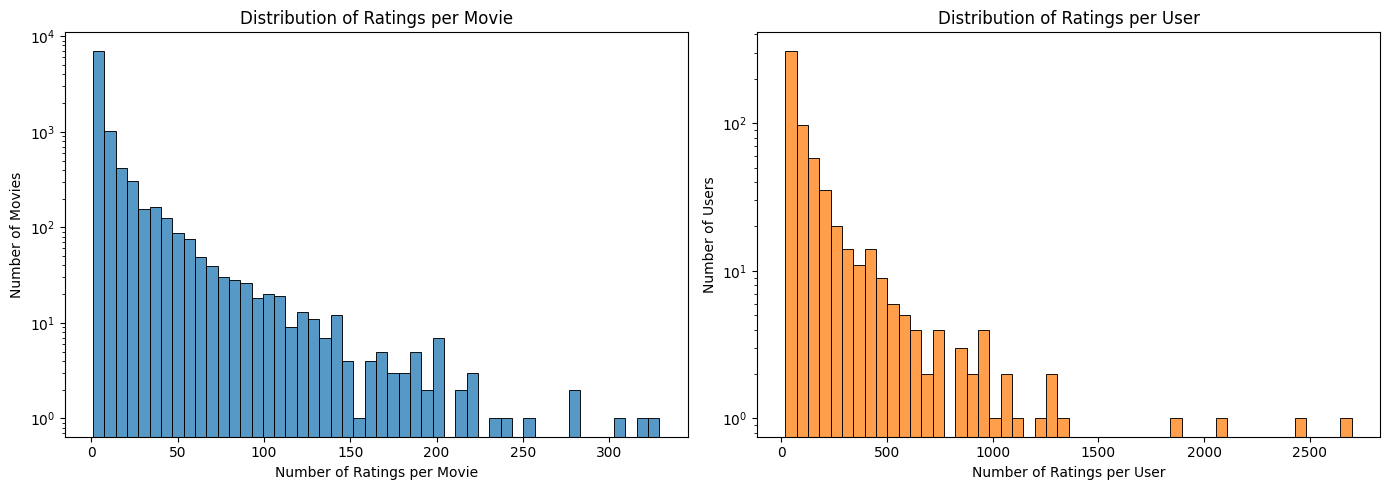

In [557]:

# Ratings per movie
ratings_per_movie = rating['movieId'].value_counts()

# Ratings per user
ratings_per_user = rating['userId'].value_counts()

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Ratings per movie
sns.histplot(ratings_per_movie, bins=50, kde=False, color='C0', ax=axes[0])
axes[0].set_title('Distribution of Ratings per Movie')
axes[0].set_xlabel('Number of Ratings per Movie')
axes[0].set_ylabel('Number of Movies')
axes[0].set_yscale('log')  # shows long-tail clearly

# Plot 2: Ratings per user
sns.histplot(ratings_per_user, bins=50, kde=False, color='C1', ax=axes[1])
axes[1].set_title('Distribution of Ratings per User')
axes[1].set_xlabel('Number of Ratings per User')
axes[1].set_ylabel('Number of Users')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()


In [558]:
print("Ratings per Movie:")
print(ratings_per_movie.describe())

print("\nRatings per User:")
print(ratings_per_user.describe())


Ratings per Movie:
count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: count, dtype: float64

Ratings per User:
count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: count, dtype: float64


In [559]:
ratings_matrix = rating.pivot_table(index='userId', columns='movieId', values='rating')

ratings_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [560]:
active_users = rating['userId'].value_counts().head(200).index
sample_users = np.random.choice(active_users, size=50, replace=False)

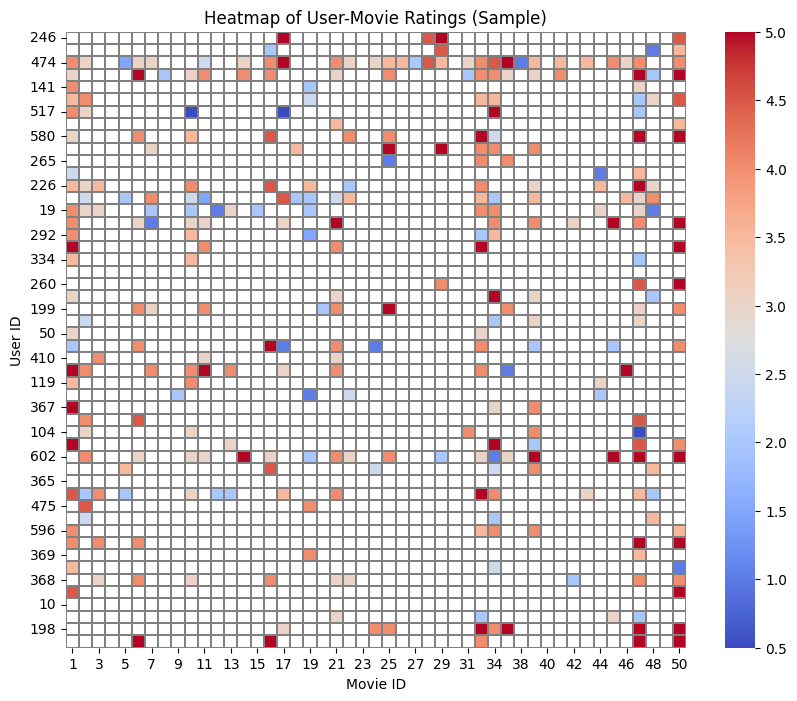

In [561]:
# Select a manageable sample
sample_matrix = ratings_matrix.loc[sample_users, :50]

plt.figure(figsize=(10, 8))
sns.heatmap(sample_matrix, cmap='coolwarm', linewidths=0.3, linecolor='gray')
plt.title('Heatmap of User-Movie Ratings (Sample)')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()


Feature Engineering 

In [564]:
movies_rating.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1995


In [565]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split genres into lists
movies_rating['genres'] = movies_rating['genres'].apply(lambda x: x.split('|') if isinstance(x, str) else [])

# Multi-hot encode
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(movies_rating['genres']),
                             columns=mlb.classes_,
                             index=movies_rating.index)

# Combine with original dataframe
movies_rating = pd.concat([movies_rating, genre_encoded], axis=1)

movies_rating.head(3)


,movieId,title,genres,userId,rating,timestamp,year,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703,1995,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962,1995,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946,1995,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [566]:
if 'timestamp' in movies_rating.columns:
    movies_rating['dt'] = pd.to_datetime(movies_rating['timestamp'], unit='s', errors='coerce')
else:
    movies_rating['dt'] = pd.NaT

movies_rating.drop(columns=['timestamp'], inplace=True)
movies_rating.head()

,movieId,title,genres,userId,rating,year,(no genres listed),Action,Adventure,Animation,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,dt
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,1995,0,0,1,1,...,0,0,0,0,0,0,0,0,0,2000-07-30 18:45:03
1,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,1995,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1996-11-08 06:36:02
2,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1995,0,0,1,1,...,0,0,0,0,0,0,0,0,0,2005-01-25 06:52:26
3,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1995,0,0,1,1,...,0,0,0,0,0,0,0,0,0,2017-11-13 12:59:30
4,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1995,0,0,1,1,...,0,0,0,0,0,0,0,0,0,2011-05-18 05:28:03


In [567]:
# Reorder columns to place 'date and time' after 'rating'
col = movies_rating.columns.tolist()
col.insert(5, col.pop(col.index('dt')))
movies_rating = movies_rating[col]

In [568]:
movies_rating.head()

,movieId,title,genres,userId,rating,dt,year,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,2000-07-30 18:45:03,1995,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,1996-11-08 06:36:02,1995,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,2005-01-25 06:52:26,1995,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,2017-11-13 12:59:30,1995,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,2011-05-18 05:28:03,1995,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [569]:
# user rating counts
user_counts = movies_rating['userId'].value_counts()

# users eligible for having a holdout (>=2 ratings)
eligible_users = user_counts[user_counts >= 2].index

# sort so "last" is the most recent
movies_rating = movies_rating.sort_values(['userId', 'dt'])

In [570]:
# pick last interaction per eligible user as test
test_idx = movies_rating[movies_rating['userId'].isin(eligible_users)].groupby('userId').tail(1).index

test = movies_rating.loc[test_idx].copy()
train = movies_rating.drop(test_idx).copy()

print(f"Total interactions: {len(movies_rating)}")
print(f"Train interactions: {len(train)}")
print(f"Test interactions: {len(test)}  (held-out = last interaction for {len(eligible_users)} users)")

Total interactions: 100836
Train interactions: 100226
Test interactions: 610  (held-out = last interaction for 610 users)


In [ ]:
assert movies_rating.groupby('userId')['dt'].is_monotonic_increasing.all()

In [573]:
assert set(train.index).isdisjoint(set(test.index))
assert train['userId'].nunique() >= test['userId'].nunique()

In [575]:
movies_rating[movies_rating['userId'] == 1][['userId', 'movieId', 'dt', 'rating']]


,userId,movieId,dt,rating
19452,1,804,2000-07-30 18:08:19,4.0
25865,1,1210,2000-07-30 18:08:19,5.0
38361,1,2018,2000-07-30 18:08:43,5.0
45807,1,2628,2000-07-30 18:08:43,4.0
48507,1,2826,2000-07-30 18:08:43,4.0
...,...,...,...,...
31782,1,1445,2000-07-30 19:08:32,3.0
14984,1,553,2000-07-30 19:09:13,5.0
44192,1,2478,2000-07-30 19:09:29,4.0
38226,1,2012,2000-07-30 19:09:36,4.0


In [577]:
train.head()

,movieId,title,genres,userId,rating,dt,year,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
19452,804,She's the One,"[Comedy, Romance]",1,4.0,2000-07-30 18:08:19,1996,0,0,0,...,0,0,0,0,0,1,0,0,0,0
25865,1210,Star Wars: Episode VI - Return of the Jedi,"[Action, Adventure, Sci-Fi]",1,5.0,2000-07-30 18:08:19,1983,0,1,1,...,0,0,0,0,0,0,1,0,0,0
38361,2018,Bambi,"[Animation, Children, Drama]",1,5.0,2000-07-30 18:08:43,1942,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45807,2628,Star Wars: Episode I - The Phantom Menace,"[Action, Adventure, Sci-Fi]",1,4.0,2000-07-30 18:08:43,1999,0,1,1,...,0,0,0,0,0,0,1,0,0,0
48507,2826,"13th Warrior, The","[Action, Adventure, Fantasy]",1,4.0,2000-07-30 18:08:43,1999,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [578]:
test.head()

,movieId,title,genres,userId,rating,dt,year,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
44304,2492,20 Dates,"[Comedy, Romance]",1,4.0,2000-08-08 07:27:42,1998,0,0,0,...,0,0,0,0,0,1,0,0,0,0
91776,80489,"Town, The","[Crime, Drama, Thriller]",2,4.5,2015-10-24 19:35:40,2010,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43680,2424,You've Got Mail,"[Comedy, Romance]",3,0.5,2011-05-27 02:44:53,1998,0,0,0,...,0,0,0,0,0,1,0,0,0,0
60969,4246,Bridget Jones's Diary,"[Comedy, Drama, Romance]",4,4.0,2001-12-05 17:49:02,2001,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12967,474,In the Line of Fire,"[Action, Thriller]",5,4.0,1996-11-08 06:42:17,1993,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [579]:
# Saving the train and test datasets to CSV files

train.to_csv(r"d:\Data\Movie-Recommendation-System\train_movies_rating.csv", index=False)
test.to_csv(r"d:\Data\Movie-Recommendation-System\test_movies_rating.csv", index=False)

In [580]:
# Aggregate rating stats per movie
movie_stats_train = train.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()
movie_stats_train.columns = ['movieId', 'avg_movie_rating', 'rating_count']

#Merge into train
train = train.merge(movie_stats_train, on='movieId', how='left')

# fill missing counts for movies with no ratings (if any)
train['rating_count'] = train['rating_count'].fillna(0).astype(int)

# fill missing average ratings for movies with no ratings (if any)
train['avg_movie_rating'] = train['avg_movie_rating'].fillna(train['avg_movie_rating'].mean())

train.head(5)

,movieId,title,genres,userId,rating,dt,year,(no genres listed),Action,Adventure,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_movie_rating,rating_count
0,804,She's the One,"[Comedy, Romance]",1,4.0,2000-07-30 18:08:19,1996,0,0,0,...,0,0,0,1,0,0,0,0,3.250000,8
1,1210,Star Wars: Episode VI - Return of the Jedi,"[Action, Adventure, Sci-Fi]",1,5.0,2000-07-30 18:08:19,1983,0,1,1,...,0,0,0,0,1,0,0,0,4.137755,196
2,2018,Bambi,"[Animation, Children, Drama]",1,5.0,2000-07-30 18:08:43,1942,0,0,0,...,0,0,0,0,0,0,0,0,3.361111,36
3,2628,Star Wars: Episode I - The Phantom Menace,"[Action, Adventure, Sci-Fi]",1,4.0,2000-07-30 18:08:43,1999,0,1,1,...,0,0,0,0,1,0,0,0,3.086957,138
4,2826,"13th Warrior, The","[Action, Adventure, Fantasy]",1,4.0,2000-07-30 18:08:43,1999,0,1,1,...,0,0,0,0,0,0,0,0,2.903846,26


In [581]:
# Merge movie stats (computed from train) into test
test = test.merge(movie_stats_train, on='movieId', how='left')

# Fill missing (for movies unseen in train)
test['rating_count'] = test['rating_count'].fillna(0).astype(int)
test['avg_movie_rating'] = test['avg_movie_rating'].fillna(train['avg_movie_rating'].mean())
test.head()

,movieId,title,genres,userId,rating,dt,year,(no genres listed),Action,Adventure,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_movie_rating,rating_count
0,2492,20 Dates,"[Comedy, Romance]",1,4.0,2000-08-08 07:27:42,1998,0,0,0,...,0,0,0,1,0,0,0,0,2.833333,6
1,80489,"Town, The","[Crime, Drama, Thriller]",2,4.5,2015-10-24 19:35:40,2010,0,0,0,...,0,0,0,0,0,1,0,0,3.928571,21
2,2424,You've Got Mail,"[Comedy, Romance]",3,0.5,2011-05-27 02:44:53,1998,0,0,0,...,0,0,0,1,0,0,0,0,3.218750,48
3,4246,Bridget Jones's Diary,"[Comedy, Drama, Romance]",4,4.0,2001-12-05 17:49:02,2001,0,0,0,...,0,0,0,1,0,0,0,0,3.617188,64
4,474,In the Line of Fire,"[Action, Thriller]",5,4.0,1996-11-08 06:42:17,1993,0,1,0,...,0,0,0,0,0,1,0,0,3.688406,69


In [582]:
# Creating user features: average rating, count of ratings, standard deviation of ratings

user_features_train = train.groupby('userId')['rating'].agg(['mean', 'count', 'std']).reset_index()
user_features_train.columns = ['userId', 'user_avg_rating', 'user_rating_count', 'user_std_rating']
user_features_train.head()


,userId,user_avg_rating,user_rating_count,user_std_rating
0,1,4.367965,231,0.801420
1,2,3.928571,28,0.813250
2,3,2.486842,38,2.094029
3,4,3.553488,215,1.316919
4,5,3.627907,43,1.000554


In [583]:
# merge user features into train
train = train.merge(user_features_train, on='userId', how='left')
train.head()

,movieId,title,genres,userId,rating,dt,year,(no genres listed),Action,Adventure,...,Romance,Sci-Fi,Thriller,War,Western,avg_movie_rating,rating_count,user_avg_rating,user_rating_count,user_std_rating
0,804,She's the One,"[Comedy, Romance]",1,4.0,2000-07-30 18:08:19,1996,0,0,0,...,1,0,0,0,0,3.250000,8,4.367965,231,0.80142
1,1210,Star Wars: Episode VI - Return of the Jedi,"[Action, Adventure, Sci-Fi]",1,5.0,2000-07-30 18:08:19,1983,0,1,1,...,0,1,0,0,0,4.137755,196,4.367965,231,0.80142
2,2018,Bambi,"[Animation, Children, Drama]",1,5.0,2000-07-30 18:08:43,1942,0,0,0,...,0,0,0,0,0,3.361111,36,4.367965,231,0.80142
3,2628,Star Wars: Episode I - The Phantom Menace,"[Action, Adventure, Sci-Fi]",1,4.0,2000-07-30 18:08:43,1999,0,1,1,...,0,1,0,0,0,3.086957,138,4.367965,231,0.80142
4,2826,"13th Warrior, The","[Action, Adventure, Fantasy]",1,4.0,2000-07-30 18:08:43,1999,0,1,1,...,0,0,0,0,0,2.903846,26,4.367965,231,0.80142


In [584]:
# Merge user feature (computed from train) into test
test = test.merge(user_features_train, on='userId', how='left')

# 
test['user_rating_count'] = test['user_rating_count'].fillna(0).astype(int)
test['user_avg_rating'] = test['user_avg_rating'].fillna(train['user_avg_rating'].mean())
test['user_std_rating'] = test['user_std_rating'].fillna(train['user_std_rating'].mean())
test.head()

,movieId,title,genres,userId,rating,dt,year,(no genres listed),Action,Adventure,...,Romance,Sci-Fi,Thriller,War,Western,avg_movie_rating,rating_count,user_avg_rating,user_rating_count,user_std_rating
0,2492,20 Dates,"[Comedy, Romance]",1,4.0,2000-08-08 07:27:42,1998,0,0,0,...,1,0,0,0,0,2.833333,6,4.367965,231,0.801420
1,80489,"Town, The","[Crime, Drama, Thriller]",2,4.5,2015-10-24 19:35:40,2010,0,0,0,...,0,0,1,0,0,3.928571,21,3.928571,28,0.813250
2,2424,You've Got Mail,"[Comedy, Romance]",3,0.5,2011-05-27 02:44:53,1998,0,0,0,...,1,0,0,0,0,3.218750,48,2.486842,38,2.094029
3,4246,Bridget Jones's Diary,"[Comedy, Drama, Romance]",4,4.0,2001-12-05 17:49:02,2001,0,0,0,...,1,0,0,0,0,3.617188,64,3.553488,215,1.316919
4,474,In the Line of Fire,"[Action, Thriller]",5,4.0,1996-11-08 06:42:17,1993,0,1,0,...,0,0,1,0,0,3.688406,69,3.627907,43,1.000554


<Axes: xlabel='user_rating_count', ylabel='rating_count'>

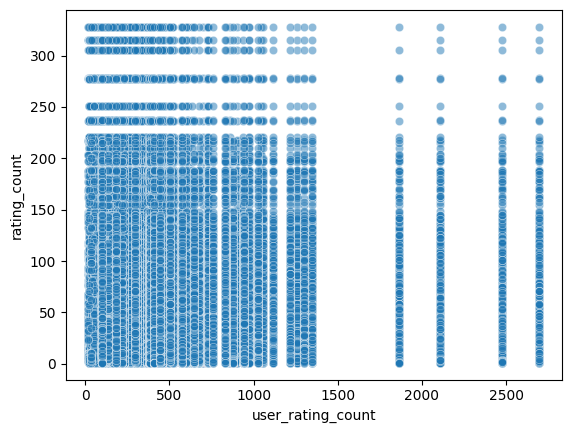

In [585]:
sns.scatterplot(data=train, x='user_rating_count', y='rating_count', alpha=0.5)


In [586]:
print(train[['userId','movieId','rating']].isna().sum())


userId     0
movieId    0
rating     0
dtype: int64
